In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load the dataset
df = pd.read_csv('HousingData.csv', na_values='NA')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [4]:
# Fill missing values with column mean
for i in df.columns:
    mean_value = df[i].mean()
    df[i].fillna(mean_value, inplace=True)


<ipython-input-4-c99dff44bd0a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mean_value, inplace=True)


In [8]:
# Split features and target
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [10]:
# Feature scaling
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)


In [11]:
# Build the DNN model
model = Sequential()
model.add(Dense(128, input_shape=(13,), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))  # Linear for regression

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 587.5008 - mae: 22.2264 - val_loss: 597.3287 - val_mae: 22.4888
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 515.8150 - mae: 20.8669 - val_loss: 544.2042 - val_mae: 21.2175
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 514.7925 - mae: 20.2861 - val_loss: 456.4021 - val_mae: 18.9127
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 400.2280 - mae: 17.4733 - val_loss: 333.2153 - val_mae: 15.1630
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 281.8125 - mae: 13.6760 - val_loss: 207.3819 - val_mae: 10.7548
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 165.0891 - mae: 10.0660 - val_loss: 141.1369 - val_mae: 8.4182
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 140.0086 - mae: 9.1544 - val_loss: 124.3618 - val_mae: 8.0418
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 132.0845 - mae: 8.7233 - val_loss: 113.2784 - val_mae: 7.6053
Epoch 9/100
11/11 

In [15]:
# Evaluate the model on test data
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data:', mse_nn)
print('Mean absolute error on test data:', mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32.1037 - mae: 3.5150
Mean squared error on test data: 23.681533813476562
Mean absolute error on test data: 3.1595520973205566


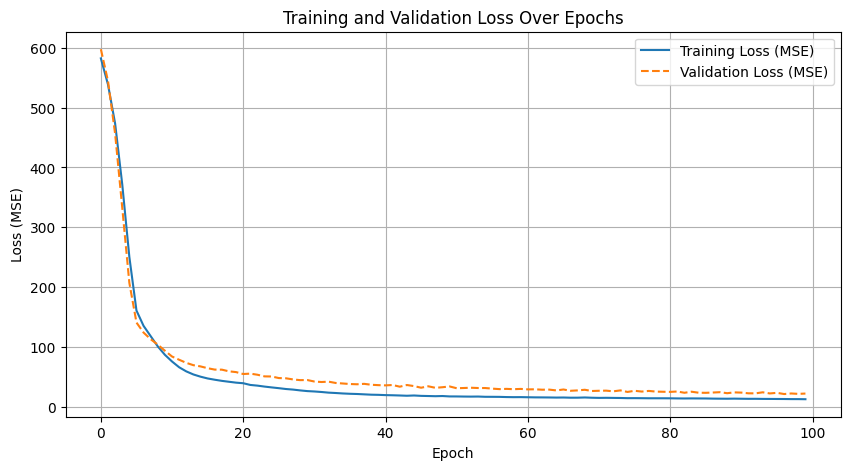

In [16]:
# Plot training/validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', linestyle='--')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Predict on test set
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [19]:
# Show some predicted vs actual housing prices
print("\nSample Predictions vs Actual Values:")
for i in range(10):  # Show first 10 predictions
    print(f"Predicted: {y_pred[i][0]:.2f} | Actual: {y_test.values[i][0]:.2f}")


Sample Predictions vs Actual Values:
Predicted: 10.73 | Actual: 15.00
Predicted: 27.14 | Actual: 26.60
Predicted: 42.79 | Actual: 45.40
Predicted: 14.89 | Actual: 20.80
Predicted: 29.20 | Actual: 34.90
Predicted: 43.18 | Actual: 21.90
Predicted: 25.81 | Actual: 28.70
Predicted: 11.63 | Actual: 7.20
Predicted: 15.04 | Actual: 20.00
Predicted: 30.39 | Actual: 32.20


In [18]:
# Compute R² score
r2 = r2_score(y_test, y_pred)
print('R² score on test data:', r2)

R² score on test data: 0.7070136070251465
